This dataset captures the pulse of viral social media trends across Facebook, Instagram and Twitter. It provides insights into the most popular hashtags, content types, and user engagement levels, offering a comprehensive view of how trends unfold across platforms. With regional data and influencer-driven content, this dataset is perfect for:

Trend analysis 🔍
Sentiment modeling 💭
Understanding influencer marketing 📈
Dive in to explore what makes content go viral, the behaviors that drive engagement, and how trends evolve on a global scale! 🌍

In [2]:
import pandas as pd

#Cargar el dataset
df = pd.read_csv("social_media_engagement1.csv")

#Conocer el dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB
None


1. ¿Cuál es el propósito principal del análisis?

    ¿Qué preguntas específicas quieres responder?:

    * ¿Qué tipos de contenido (video, imagen, texto, carrusel) generan más interacción en cada red social?
    * ¿Qué plataformas generan mayor engagement promedio?
    
2.  Contexto del Negocio
    * ¿Cómo varía el engagement (likes, shares, comments) entre Facebook, Instagram y Twitter?
    * ¿Qué tipos de contenido son más virales por plataforma?
    * ¿Existen diferencias notables en el uso de hashtags por red social?

3. Alcance del Análisis:
    ¿Qué aspectos están dentro y fuera del alcance del análisis? Análisis Exploratorio de Tendencias y Viralidad, Comparación entre Plataformas Sociales 
    ¿Qué limitaciones deben tenerse en cuenta?  Segmentación por Región y Temporalidady Segmentación por Región y Temporalidad

4. Resultados Esperados
    ¿Qué tipo de resultados se espera del análisis?
    ¿Cómo se utilizarán estos resultados?
  * Plataformas con mayor engagement promedio y sus características comunes.
 * Correlaciones entre variables (likes, shares, comentarios, tipo de contenido).


In [3]:
print(df.describe())

          post_id        likes   comments      shares
count  100.000000   100.000000  100.00000  100.000000
mean    50.500000  2381.810000  202.66000  415.650000
std     29.011492  1632.573284  138.84067  283.877601
min      1.000000    15.000000   10.00000   16.000000
25%     25.750000   895.750000   89.75000  183.000000
50%     50.500000  2220.000000  171.00000  356.500000
75%     75.250000  3593.250000  299.00000  689.500000
max    100.000000  5000.000000  500.00000  993.000000


## Exploración de datos

In [4]:
#1. datos faltantes

df.isnull().sum()

post_id            0
platform           0
post_type          0
post_time          0
likes              0
comments           0
shares             0
post_day           0
sentiment_score    0
dtype: int64

In [5]:
#2. ¿Hay duplicados?
df.duplicated().sum()

np.int64(0)

In [6]:
#3. Obtener valores unicos 
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
    print(f'Columna:  {col}')
    print(f'Número de valores únicos: {len(values)}')
    print(f'Valores únicos: {values[:10]}')
    print('-'*50)

Columna:  post_id
Número de valores únicos: 100
Valores únicos: [ 1  2  3  4  5  6  7  8  9 10]
--------------------------------------------------
Columna:  platform
Número de valores únicos: 3
Valores únicos: ['Facebook' 'Instagram' 'Twitter']
--------------------------------------------------
Columna:  post_type
Número de valores únicos: 5
Valores únicos: ['image' 'carousel' 'poll' 'video' 'text']
--------------------------------------------------
Columna:  post_time
Número de valores únicos: 99
Valores únicos: ['8/17/2023 14:45' '5/14/2023 0:45' '2/21/2023 16:15' '11/16/2023 0:45'
 '5/23/2023 0:30' '5/5/2023 20:00' '2/26/2023 11:45' '10/28/2023 19:30'
 '5/2/2023 6:15' '5/11/2023 11:00']
--------------------------------------------------
Columna:  likes
Número de valores únicos: 93
Valores únicos: [2121 3660 4955 1183 3499  256 1982 1274  317 1878]
--------------------------------------------------
Columna:  comments
Número de valores únicos: 85
Valores únicos: [474 432 408  90 247 1

## Limpieza

In [7]:
#si tuviese filas duplicadas, las eliminaria, para ello creamos un nuevo dataframe

#data_cleaned = df.drop_duplicates()
#data_cleaned = data_cleaned.dropna(subset=['Columna_que_deberia_borrar']) #Le puedo especificar la columna

#Si quisiese realizar una nueva columna
#data_cleaned['Nueva_columna'] = data_cleaned['comments'] * data_cleaned['shares']

df['Total_interaccion'] = df['comments'] + df['shares'] + df['likes']


In [8]:
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,Total_interaccion
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive,3223
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral,4786
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative,6051
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative,1460
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive,4032


In [9]:
#Conversión de los tipos de datos
df['post_time'] = pd.to_datetime(df['post_time'])
df['post_day'] = df['post_day'].astype('category') 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   post_id            100 non-null    int64         
 1   platform           100 non-null    object        
 2   post_type          100 non-null    object        
 3   post_time          100 non-null    datetime64[ns]
 4   likes              100 non-null    int64         
 5   comments           100 non-null    int64         
 6   shares             100 non-null    int64         
 7   post_day           100 non-null    category      
 8   sentiment_score    100 non-null    object        
 9   Total_interaccion  100 non-null    int64         
dtypes: category(1), datetime64[ns](1), int64(5), object(3)
memory usage: 7.6+ KB


In [10]:
df['Year'] = df['post_time'].dt.year
df['Month'] = df['post_time'].dt.month

df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,Total_interaccion,Year,Month
0,1,Facebook,image,2023-08-17 14:45:00,2121,474,628,Thursday,positive,3223,2023,8
1,2,Facebook,carousel,2023-05-14 00:45:00,3660,432,694,Sunday,neutral,4786,2023,5
2,3,Instagram,poll,2023-02-21 16:15:00,4955,408,688,Tuesday,negative,6051,2023,2
3,4,Twitter,image,2023-11-16 00:45:00,1183,90,187,Thursday,negative,1460,2023,11
4,5,Twitter,video,2023-05-23 00:30:00,3499,247,286,Tuesday,positive,4032,2023,5


In [11]:
interaction_by_year = df.groupby('Year')['Total_interaccion'].sum()
interaction_by_year

Year
2023    300012
Name: Total_interaccion, dtype: int64

In [12]:
df['Semester'] = df['Month'].apply(lambda x: 1 if x <= 6 else 2)

In [13]:
interaction_by_semester = df.groupby(['Year','Semester'])['Total_interaccion'].sum()
interaction_by_semester

Year  Semester
2023  1           161396
      2           138616
Name: Total_interaccion, dtype: int64

In [14]:
def trimestre(month):
    if month <= 3:
        return 1
    elif month <= 6:
        return 2
    elif month <= 9:
        return 3
    else:
        return 4

df['trimestre'] = df['Month'].apply(trimestre)
interaction_by_trimester = df.groupby(['Year','trimestre'])['Total_interaccion'].sum()
interaction_by_trimester


Year  trimestre
2023  1            82736
      2            78660
      3            71004
      4            67612
Name: Total_interaccion, dtype: int64

In [15]:

#interaccion mensual 

df['Month'] = df['post_time'].dt.month


interaction_by_month = df.groupby(['Month'])['Total_interaccion'].sum()
interaction_by_month

Month
1     36625
2     24110
3     22001
4     21109
5     44559
6     12992
7     42177
8     11057
9     17770
10    12806
11    22273
12    32533
Name: Total_interaccion, dtype: int64

In [16]:
meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
         'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

df['Mes_nombre'] = df['Month'].apply(lambda x: meses[x-1])
interaction_by_mes_nombre = df.groupby('Mes_nombre')['Total_interaccion'].sum()
interaction_by_mes_nombre = interaction_by_mes_nombre.reindex(meses) #para organizarlos
interaction_by_mes_nombre

Mes_nombre
enero         36625
febrero       24110
marzo         22001
abril         21109
mayo          44559
junio         12992
julio         42177
agosto        11057
septiembre    17770
octubre       12806
noviembre     22273
diciembre     32533
Name: Total_interaccion, dtype: int64

In [17]:
indice_positivo_satisfaccion = df[df['sentiment_score']== 'positive'].shape[0]
indice_neutral_satisfaccion = df[df['sentiment_score']== 'neutral'].shape[0]
indice_negative_satisfaccion = df[df['sentiment_score']== 'negative'].shape[0]

porcentaje_positivo = (indice_positivo_satisfaccion / len(df)) * 100
porcentaje_neutral = (indice_neutral_satisfaccion / len(df)) * 100
porcentaje_negativo = (indice_negative_satisfaccion / len(df)) * 100


print(f"Sentimiento positivo: {porcentaje_positivo:.2f}%")
print(f"Sentimiento neutral: {porcentaje_neutral:.2f}%")
print(f"Sentimiento negativo: {porcentaje_negativo:.2f}%")

Sentimiento positivo: 46.00%
Sentimiento neutral: 27.00%
Sentimiento negativo: 27.00%


# Representación de los datos

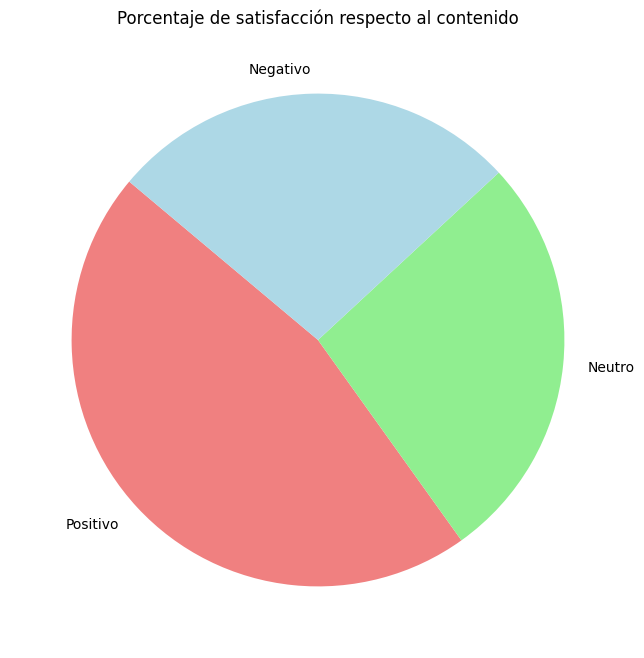

In [18]:
import matplotlib.pyplot as plt

labels = ['Positivo', 'Neutro', 'Negativo']
sizes = [porcentaje_positivo, porcentaje_neutral, porcentaje_negativo]
colors = ['lightcoral', 'lightgreen', 'lightblue']

plt.figure(figsize = (8,8))
plt.pie(sizes, labels = labels, colors = colors, startangle =140)

plt.title("Porcentaje de satisfacción respecto al contenido")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

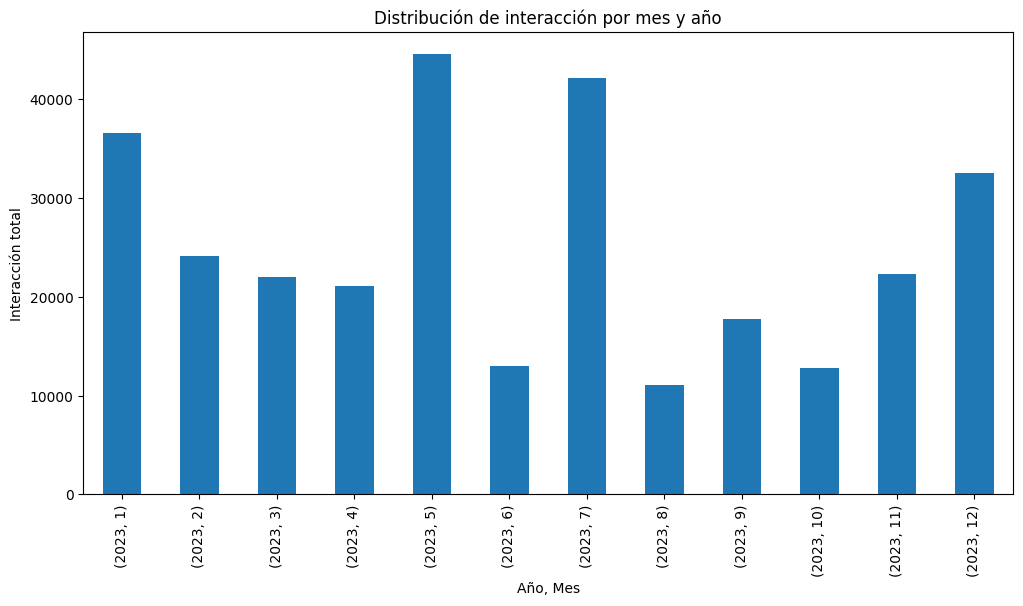

In [25]:
# Graficar la distribucion de interaccion por mes y año 
plt.figure(figsize=(12,6))
df.groupby(['Year', 'Month'])['Total_interaccion'].sum().plot(kind = 'bar')
plt.title('Distribución de interacción por mes y año')
plt.xlabel('Año, Mes')
plt.ylabel('Interacción total')
plt.show

In [23]:
top_apps = df.groupby('platform')['Total_interaccion'].sum().sort_values(ascending=False).head(3)
top_apps = top_apps.reset_index()
top_apps = pd.merge(top_apps, df[['platform', 'post_type']].drop_duplicates(), on='platform', how='left')

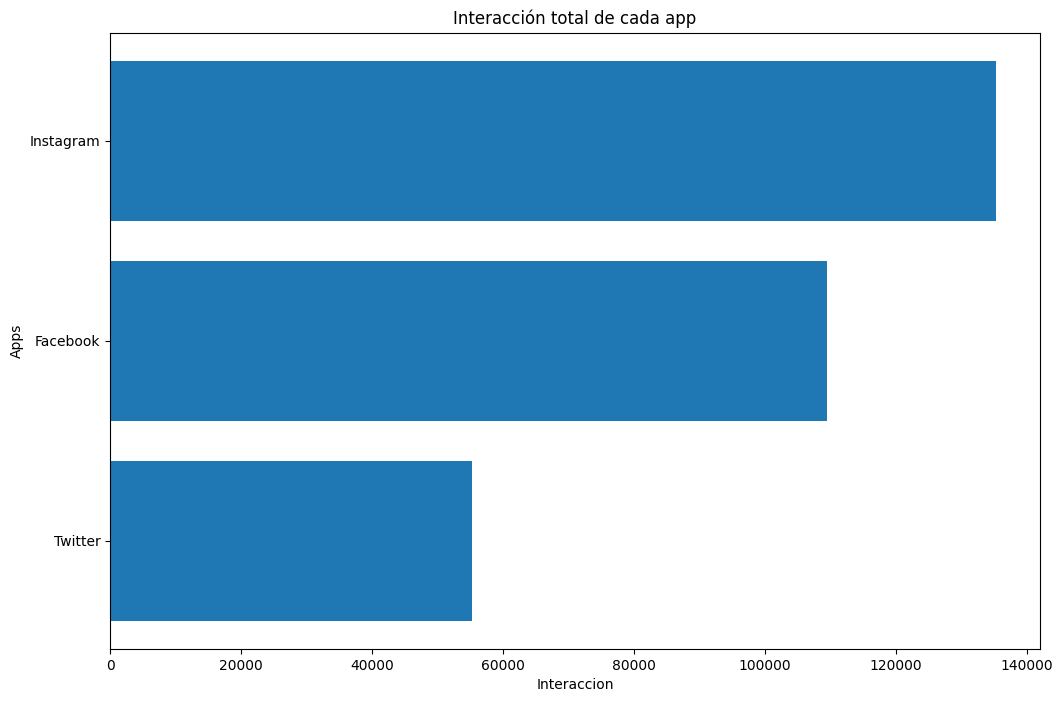

In [28]:
plt.figure(figsize = (12,8))
plt.barh(top_apps['platform'],top_apps['Total_interaccion'])
plt.title('Interacción total de cada app')
plt.xlabel('Interaccion')
plt.ylabel('Apps')
plt.gca().invert_yaxis()

plt.show()

<Axes: xlabel='post_type', ylabel='Total_interaccion'>

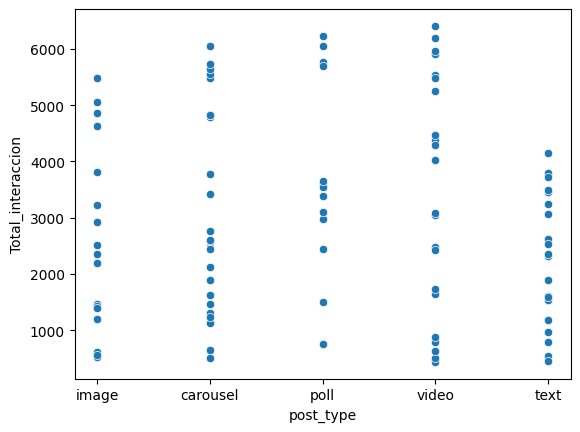

In [29]:
import seaborn as sns

sns.scatterplot(data = df, x = 'post_type', y = 'Total_interaccion')

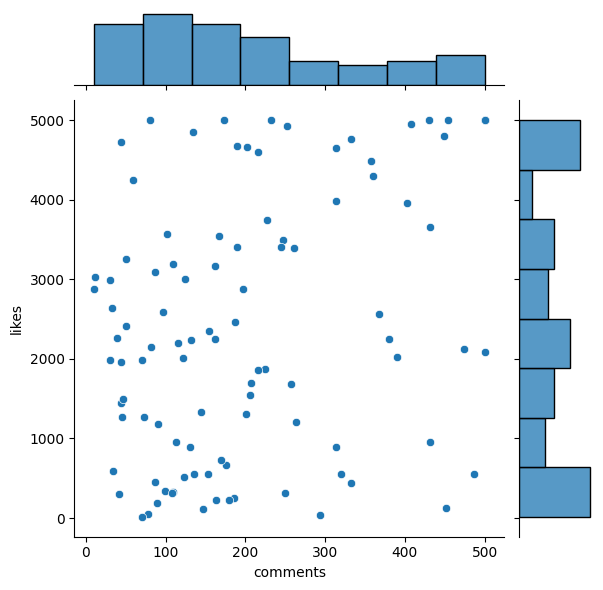

In [30]:
sns.jointplot(data = df, x = 'comments', y = 'likes', kind = 'scatter')

<Axes: xlabel='post_type', ylabel='Total_interaccion'>

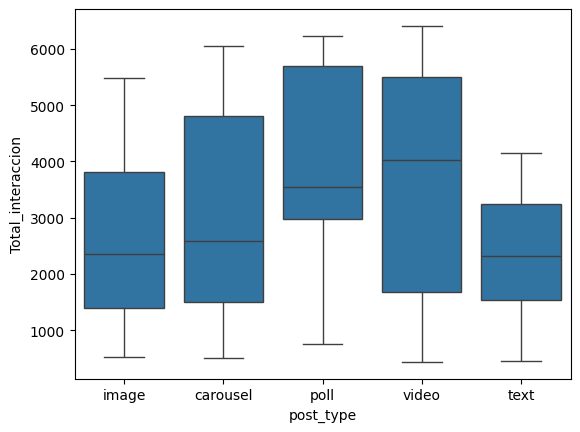

In [31]:
#Box-plot
sns.boxplot(data=df, x='post_type', y='Total_interaccion')